# Simple Classification<a class="tocSkip">
&copy; 2020 by Michael Stanley (Mike.Stanley@ieee.org)<BR>
Last revised: 27 July 2020
    
Requires presence of features.csv in thee same directory as this notebook.  That file should contain "features"
extracted from raw data by a prior step in the process (ex: Feature_Extraction_Using_Pandas).

Computed feature types can include things like: min, max, mean, std, variance, skew factor, kurtosis and sum.  
The list of possible feature types is literally unlimited.

# Import standard Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture, svm, metrics
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# set default font for charts
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

# Read CSV file
Read features.csv, shuffles it and then break that data into separate features and results dataFrames.  Then display the first few lines of the shuffled dataset.

In [3]:
fn = 'features.csv'
data = pd.read_csv(fn)
print('Data shape retreived from the features data file is: ', str(data.shape))

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

display(data.head())

Data shape retreived from the features data file is:  (262, 33)


,maxAudio_max,acc_max,mag_max,gyro_max,maxAudio_min,acc_min,mag_min,gyro_min,maxAudio_skew,acc_skew,...,gyro_mean,maxAudio_std,acc_std,mag_std,gyro_std,maxAudio_var,acc_var,mag_var,gyro_var,class
0,287.0,1.05168,181.693,4.91862,125.0,0.940416,54.5334,4.48537,0.060366,0.112127,...,4.63595,53.8679,0.043730,49.6377,0.147377,2901.75,0.001912,2463.900,0.021720,2.0
1,411.0,1.10449,194.171,4.94538,273.0,0.909384,56.0850,4.35419,0.908710,-0.046672,...,4.67629,40.9603,0.062044,52.9122,0.189117,1677.75,0.003849,2799.700,0.035765,3.0
2,322.0,1.05388,185.614,4.97176,174.0,0.935160,61.0443,4.45190,1.183500,0.484330,...,4.72728,44.5724,0.044025,46.4507,0.163387,1986.69,0.001938,2157.670,0.026695,2.0
3,237.0,1.05948,141.134,4.87497,101.0,0.934466,54.8262,4.07888,1.158520,-0.355692,...,4.50425,47.8812,0.042329,26.7623,0.231887,2292.61,0.001792,716.219,0.053771,1.0
4,460.0,1.07994,195.409,4.80730,275.0,0.913876,54.8983,4.43380,0.270347,-0.452220,...,4.61129,61.3714,0.060430,54.9351,0.137951,3766.44,0.003652,3017.860,0.019030,3.0


In [4]:
f2 = 'acc_std'
f1 = 'maxAudio_sum'
# Split out features and class membership into separate tables.
features = data[[f1, f2]]
results=data['class'].astype(int)

# Split data into training and test sets

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(features.to_numpy(), results.to_numpy(), test_size=0.33, random_state=37)


# Subroutine for XY plots: myScatter()
This utility function can create an XY plot of two features found in the input table.  We use it here to reproduce a figure originally created by the Feature_Extraction_Using_Pandas notebook used to create our test features.csv.

This particular function works with numpy arrays only.  Contrast that with myScatterPandas (found in other notebooks in this series) which expects a Pandas dataframe as input.

Unnormalized input data


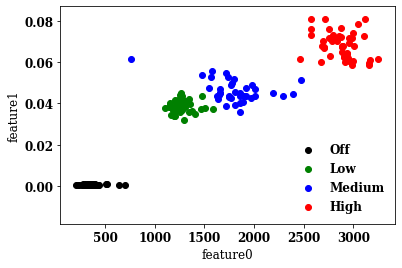

In [6]:
def myScatter(X, idx0, idx1, Y):
    labels=['Off', 'Low', 'Medium', 'High']
    color = ['black', 'green', 'blue', 'red']
    fig, ax = plt.subplots()
    x0 = X[:,idx0]
    x1 = X[:,idx1]
    for g in np.unique(Y):
        ix = np.where(g==Y)
        c=color[g]
        ax.scatter(x0[ix], x1[ix], c=c, label=labels[g])
    plt.legend(loc='best', frameon=False, labels=['Off', 'Low', 'Medium', 'High'])
    plt.xlabel('feature'+str(idx0))
    plt.ylabel('feature'+str(idx1))

print('Unnormalized input data')
myScatter(X_train, 0, 1, Y_train)


# Normalize input data
This next cell utilizes a scikit-Learn StandardScaler module.  It is FIT ONLY on the training data, but applies to both training and test data.  This distinction is required to avoid data snooping issues.

Normalized Training Set


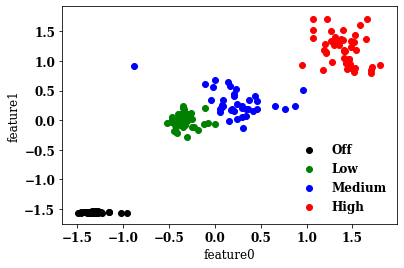

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)
print('Normalized Training Set')
myScatter(X_train, 0, 1, Y_train)

Normalized Test Set


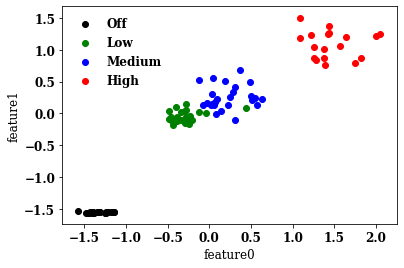

In [8]:
print('Normalized Test Set')
myScatter(X_test, 0, 1, Y_test)

# Train a model
We've included three classifier options here: multilayer perceptron, AdaBoost Classifier which uses max 2-deep decision
trees as base estimators, and LogisticRegression.  Choose mt=1, 2 or 3 to select which one you want to run.

In [9]:
mt = 1

if mt==1:
    model = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, alpha=1e-4,
                        solver='sgd', verbose=10, random_state=1,
                        learning_rate_init=.1, batch_size=10, shuffle=True)
elif mt==2:
    n_estimators=50
    model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
                             algorithm="SAMME", n_estimators=n_estimators, random_state=777)
elif mt==3:
    model=LogisticRegression(C=1)   

model.fit(X_train, Y_train)

print("Test set score: %f" % model.score(X_train, Y_train))
print("Test set score: %f" % model.score(X_test, Y_test))

Iteration 1, loss = 0.98328706
Iteration 2, loss = 0.45605657
Iteration 3, loss = 0.17950471
Iteration 4, loss = 0.09922858
Iteration 5, loss = 0.07278052
Iteration 6, loss = 0.06070111
Iteration 7, loss = 0.04979556
Iteration 8, loss = 0.04402032
Iteration 9, loss = 0.03930530
Iteration 10, loss = 0.03517301
Iteration 11, loss = 0.03284360
Iteration 12, loss = 0.03379290
Iteration 13, loss = 0.04308887
Iteration 14, loss = 0.03090027
Iteration 15, loss = 0.02696128
Iteration 16, loss = 0.02678400
Iteration 17, loss = 0.02533290
Iteration 18, loss = 0.02698027
Iteration 19, loss = 0.02626648
Iteration 20, loss = 0.03700637
Iteration 21, loss = 0.02165524
Iteration 22, loss = 0.02254306
Iteration 23, loss = 0.01959542
Iteration 24, loss = 0.01990283
Iteration 25, loss = 0.02212373
Iteration 26, loss = 0.02123040
Iteration 27, loss = 0.02204259
Iteration 28, loss = 0.02193928
Iteration 29, loss = 0.02098990
Iteration 30, loss = 0.01602776
Iteration 31, loss = 0.02241943
Iteration 32, los

# Now look at the confusion matrices
## Training Confusion Matrix

Confusion matrix for the training set


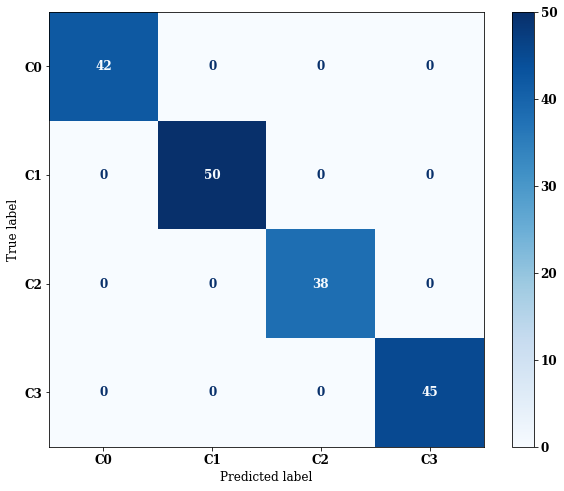

In [10]:
names = ['C0', 'C1', 'C2', 'C3']
fig, ax = plt.subplots(1, 1, figsize=(10,8))
print('Confusion matrix for the training set')
cm1=metrics.plot_confusion_matrix(model, X_train, Y_train, ax=ax, display_labels=names, cmap=plt.cm.Blues, values_format='n')

## Test Confusion Matrix

Confusion matrix for the test set


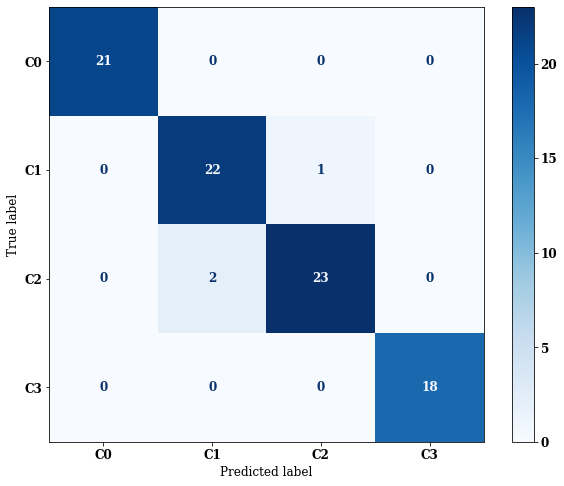

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
print('Confusion matrix for the test set')
cm2=metrics.plot_confusion_matrix(model, X_test, Y_test, ax=ax, display_labels=names, cmap=plt.cm.Blues, values_format='n')